In [12]:
import numpy as np
from astropy import constants as cn
from astropy import units as u

In [68]:
#1a

F_E = (cn.L_sun)/(4*np.pi*((cn.au)**2))
print F_E
A = 0.3
Tb = 5777.0*(u.K)
F_s = (1.0-A)*(cn.L_sun)/(16.0*np.pi*((cn.au)**2.0))
print F_s
TE = (F_s/cn.sigma_sb)**0.25
print TE

1367.56693468 W / m2
239.324213569 W / m2
254.884691982 K


In [71]:
#1b

'''I used the equation below and solved for T.
(1_A)*pi*(r^2)*F_E + (1-A)*sig*(TE^4)*4*pi*(r^2)=sig*(T^4)*4*pi*(r^2)
'''

T1 = (((1-A)*F_E + 4*(1-A)*(cn.sigma_sb)*(TE**4))/(4*(cn.sigma_sb)))**0.25
print T1

291.042212663 K


#1c

$F = \pi \int_0^{\infty}~(1-A(\lambda))~B(\lambda,T)~d\lambda$

#1d

A($\lambda$) is the most influenced by the concentration of greenhouse gases. The most common greenhouse gas in our atmosphere is actually water vapor.

#1e

We are in trouble, but not according to our future president Donald Trump.

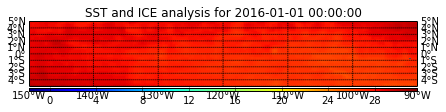

In [83]:
#2a

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-150,llcrnrlat=-5,urcrnrlon=-90,urcrnrlat=5,projection='mill')
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

[-1.49 -1.46 -1.45 -1.44 -1.41 -1.21 -1.07 -0.8  -0.74 -0.73 -0.64 -0.6
 -0.57 -0.53 -0.53 -0.39 -0.28 -0.02 -0.01  0.01  0.04  0.17  0.21  0.21
  0.26  0.29  0.34  0.6   0.7   0.74  0.75  0.77  0.83  0.97  1.38  1.74
  3.06  3.19]


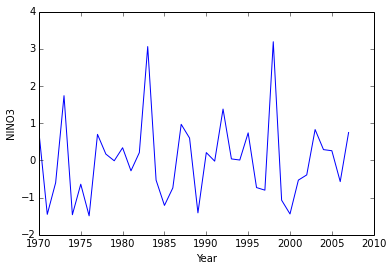

In [121]:
#2b

year,temp,precip,snow,NINO3 = np.loadtxt('calidata_final.dat',skiprows=1, unpack = True)

plt.plot(year,NINO3, 'b')
plt.xlabel('Year')
plt.ylabel('NINO3')

N = np.sort(NINO3)
print N

[ 4.17915  4.4844   4.62315  4.64535  4.70085  4.9617   5.20035  5.2836
  5.48895  5.6166   5.67765  5.67765  5.6943   5.7276   5.77755  5.7942
  5.8053   5.86635  5.96625  6.03285  6.0384   6.1383   6.27705  6.438
  6.4602   6.46575  6.59895  6.8487   6.8487   6.88755  6.94305  7.0263
  7.14285  7.23165  7.32045  7.3815   7.5258   7.5591 ]


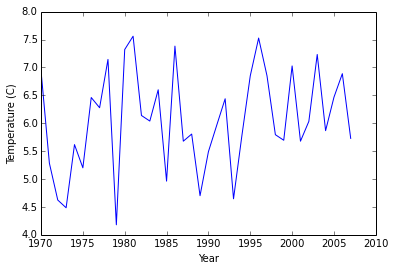

In [122]:
plt.plot(year,temp, 'b')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')

T = np.sort(temp)
print T

[ 102.8192  111.379   137.033   146.9898  162.8902  163.3982  193.0908
  213.4616  217.9574  224.5868  226.3394  228.9048  238.5568  241.2746
  253.3396  253.6444  264.5156  267.5382  270.3068  289.56    295.6814
  308.864   322.4276  327.5838  364.998   366.2934  374.8532  384.7338
  386.0292  397.6624  424.2562  431.0634  440.3852  442.2394  443.2554
  493.4204  538.8356  544.8554]


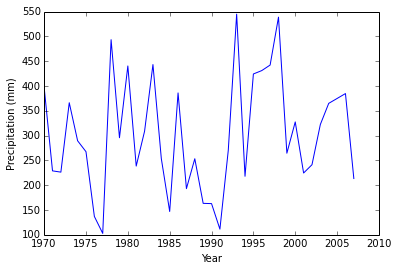

In [123]:
plt.plot(year,precip, 'b')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

P = np.sort(precip)
print P

#2c

I sorted the list and then found the corrsponding years to those values in the data by eye. The five years which had the largest El Nino events were 1998, 1983, 1973, 1992, and 1987.

#2d

The five largest years for Temperature are: 1981, 1996, 1986, 1980, and 2003.

The five largest years for Precipitation are: 1993, 1998, 1978, 1983, 1997. 

They do not perfectly correlate. It seems as though the highs for Precipitation are somewhat correlated with the highs for NINO3. However the Temperature highs are not aligned with the NINO3 highs.

In [132]:
#2e

from scipy.stats.stats import pearsonr     
print "Correlation NINO3 and Precipitation:", pearsonr(NINO3,precip)
print "Correlation NINO3 and Temperature:", pearsonr(NINO3,temp)
print "Correlation Snow and NINO3:", pearsonr(snow,NINO3)
print "Correlation Snow and Precip:", pearsonr(snow,precip)

Correlation NINO3 and Precipitation: (0.37712170125989769, 0.019596097409072206)
Correlation NINO3 and Temperature: (0.0051124458580692339, 0.9756981034908927)
Correlation Snow and NINO3: (0.14197230760465335, 0.39518075319425461)
Correlation Snow and Precip: (0.22193218268418727, 0.18052143629081543)


The correlation between Temperatre and the NINO3 data is low with a Pearson coefficient of 0.05. The coorrelation cooefficient for the Precipitation and NINO3 data is higher at 0.37 but still does nto indicate a strong correlation. These seem to match the temperature jet streams shown in the map in the assignment. It seems as though snow and precipitation are more correlated than the Temperature and NINO3 data, which is interesting because they should be anti-correlated. 

#2f

From the graphic on the website it seems as though we are currently in a warm year event with the highest spots being at 30. 